<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import re
import pickle
import itertools
from collections import Counter
from sklearn.model_selection import ParameterSampler


from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, TSNE

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from colorcet import glasbey as palette_bokeh


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [32]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package chat80 to /root/nltk_data...
       |   Package chat80 is already up-to-date!
       | Downloading package cmudict to /root/nltk_data...
       |   Package cmudict is already up-to-date!
       | Downloading package conll2000 to /root/nltk_data...
       |   Package conll2000 is already up-to-date!
       | Downloading package conll2002 to /root/nltk_data...
       |   Package conll2002 is already up-to-date!
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Package dependency_treebank is already up-to-date!
       | Downloading package genesis to /root/nltk_data...
       |   Package genesis is already up-to-date!
       | Downloading package gutenberg to /root/nltk_data...
       |   Package gutenberg is already


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [33]:
yum = pd.read_pickle('yummly.pkl')
yum

,Unnamed: 0,id,recipeName,rating,totalTimeInSeconds,course,cuisine,ingredients
0,0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4,3600.0,NaN,[Southern & Soul Food],"[buttermilk cornbread, sandwich bread, salt, b..."
1,1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4,8100.0,[Desserts],[American],"[Country CrockÂ® Spread, light corn syrup, cre..."
2,2,Buckeyes-298471,Buckeyes,4,6600.0,[Desserts],[American],"[SkippyÂ® Super ChunkÂ® Peanut Butter, Country..."
3,3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4,2100.0,[Appetizers],[American],"[light mayonnaise, lemon juice, cayenne pepper..."
4,4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4,1500.0,"[Salads, Side Dishes]",[American],"[elbow macaroni, hellmann' or best food real m..."
...,...,...,...,...,...,...,...,...
8659,495,Thai-Style-Broiled-Shrimp-779084,Thai-Style Broiled Shrimp,3,600.0,NaN,[Thai],"[garlic cloves, thai chile, salt, sugar, fish ..."
8660,496,Pad-Thai-French-Fries-984208,Pad Thai French Fries,4,1800.0,NaN,[Thai],"[sauce, fish sauce, cilantro, lime, peanuts, c..."
8661,497,Spicy-Thai-Lobster-Soup-My-Recipes,Spicy Thai Lobster Soup,4,3300.0,"[Main Dishes, Soups]","[Asian, Thai]","[lobster, vegetable oil, asian, fish, lime rin..."
8662,498,Thai-Green-Papaya-Salad-_Som-Tam_-1266284,Thai Green Papaya Salad (Som Tam),4,1200.0,[Main Dishes],"[Barbecue, Thai]","[fresh lime juice, palm sugar, fish sauce, gar..."


In [34]:
yum.isna().sum()

Unnamed: 0              0
id                      0
recipeName              0
rating                  0
totalTimeInSeconds    326
course                791
cuisine                 0
ingredients             0
dtype: int64

In [35]:
yum.dropna()

,Unnamed: 0,id,recipeName,rating,totalTimeInSeconds,course,cuisine,ingredients
1,1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4,8100.0,[Desserts],[American],"[Country CrockÂ® Spread, light corn syrup, cre..."
2,2,Buckeyes-298471,Buckeyes,4,6600.0,[Desserts],[American],"[SkippyÂ® Super ChunkÂ® Peanut Butter, Country..."
3,3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4,2100.0,[Appetizers],[American],"[light mayonnaise, lemon juice, cayenne pepper..."
4,4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4,1500.0,"[Salads, Side Dishes]",[American],"[elbow macaroni, hellmann' or best food real m..."
5,5,Classic-coleslaw-303481,Classic Coleslaw,4,600.0,"[Salads, Side Dishes]","[American, Southern & Soul Food]","[hellmann' or best food real mayonnais, lemon ..."
...,...,...,...,...,...,...,...,...
8657,493,Thai-Coconut-Soup-MyRecipes-246201,Thai Coconut Soup,4,2400.0,[Soups],"[Thai, Asian]","[chicken broth, coconut milk, fish sauce, fres..."
8658,494,Thai-Coconut-Shrimp-Soup-901927,Thai Coconut Shrimp Soup,3,1500.0,[Soups],[Thai],"[olive oil, large shrimp, carrots, garlic, gin..."
8661,497,Spicy-Thai-Lobster-Soup-My-Recipes,Spicy Thai Lobster Soup,4,3300.0,"[Main Dishes, Soups]","[Asian, Thai]","[lobster, vegetable oil, asian, fish, lime rin..."
8662,498,Thai-Green-Papaya-Salad-_Som-Tam_-1266284,Thai Green Papaya Salad (Som Tam),4,1200.0,[Main Dishes],"[Barbecue, Thai]","[fresh lime juice, palm sugar, fish sauce, gar..."


The function `split_ingr` takes a long string of ingredients, applies lemmatization, regex cleaning, and then splits the processed text into individual words. This is designed to prepare and transform ingredient lists for analysis in an assignment report, ensuring consistency and uniformity in the textual data.

In [36]:
#take the long string in 'ingredients', lemmatize, regex, and split into words
def split_ingr(x):
    wnl=WordNetLemmatizer()
    cleanlist=[]
    lst = x.strip('[]').split(',')
    cleanlist=[' '.join(wnl.lemmatize(word.lower()) for word in word_tokenize(re.sub('[^a-zA-Z]',' ',item))) for item in lst]
    return cleanlist


The `remove_word` function eliminates low-information words from a given word by searching and removing specific phrases associated with nutritional information, such as "low fat," "fat free," and "gluten free," among others. This helps enhance the clarity and relevance of the ingredient data in the context of an assignment report.

In [38]:
#remove low-information words from ingredients, could use more
def remove_word(word):
    alist =['low fat', 'reduced fat', 'fat free', 'fatfree', 'nonfat','gluten free', 'free range',\
            'reduced sodium', 'salt free','sodium free', 'low sodium', 'sweetened','unsweetened','large','extra large','oz ']
    for item in alist:
        word = word.replace(item,'')
    return word

The `cleanup_ingredients` function refines ingredient data within a DataFrame. It identifies unique ingredients, categorizes them based on the presence of spaces, and then matches them with the DataFrame's content. The function filters and modifies the DataFrame, adding columns for missing and matched ingredients, and subsequently creates binary columns for each matched ingredient. The result is a structured DataFrame ready for analysis, with unnecessary columns removed. Overall, the function streamlines the ingredient data processing pipeline for improved clarity and relevance in subsequent tasks.

In [7]:
def cleanup_ingredients(ingr, df, col):
    df_ingr = set()
    df[col].map(lambda x: [df_ingr.add(i) for i in x])

    long_ingredients = filter(lambda x: ' ' in x, ingr)
    short_ingredients = ingr - set(long_ingredients)
    df_dic = {}

    for item in long_ingredients:
        for key in df_ingr:
            if item in key:
                if key not in df_dic:
                    df_dic[key] = [item]
                else:
                    df_dic[key].append(item)

    for item in short_ingredients:
        for key in df_ingr:
            if item in key.split():
                if key not in df_dic:
                    df_dic[key] = [item]
                else:
                    df_dic[key].append(item)

    diff_dic = df_ingr - set(df_dic.keys())

    df_dic = tweak_dic(df_dic, diff_dic)
    diff_dic = df_ingr - set(df_dic.keys())
    print('length of ingredients, matched ingredients, missed ingredients')
    print(len(df_ingr), len(df_dic.keys()), len(diff_dic))

    df2 = df.copy()
    df2['len_diff'] = df2[col].apply(lambda x: count_missing(x, df_dic))
    df2['match ingredients'] = df2[col].apply(lambda x: ingr_replace(x, df_dic))
    df2['len_match'] = df2['match ingredients'].apply(lambda x: len(x))
    # remove entries with fewer match ingredients or no matching ingr_ingredients
    df3 = df2[(df2['len_diff'] < 3) & (df2['len_match'] != 0)]
    print('dataframe shape before and after filtering')
    print(df2.shape, df3.shape)

    # sort ingredients set for later matching to flavor
    match_ingr = set()
    df3['match ingredients'].map(lambda x: [match_ingr.add(i) for i in x])
    sorted_ingr = sorted(list(match_ingr))
    # create columns for each ingredient
    df4 = df3.copy()
    for item in sorted_ingr:
        df4[item] = df4['match ingredients'].apply(lambda x: item in x)

    df_X = df4.drop(df3.columns, axis=1)

    return df4, df_X


The `tweak_dic` function refines a dictionary (df_dic) by addressing specific cases where ingredients may not match directly. It focuses on common ingredients, such as different types of peppers, flours, and meats, ensuring uniformity in representation. For instance, it standardizes entries related to peppers by replacing variations with 'tabasco pepper,' addresses flour-related entries with 'whole grain wheat flour,' and resolves variations like 'yoghurt' to 'yogurt.' The function also consolidates diverse beef-related terms, like 'rib' and 'sirloin,' under a general 'beef' category. Additionally, it standardizes entries related to fish fillets, cheeses, dried spinach, and curry ingredients.

In [8]:
def tweak_dic(df_dic, diff_df):
    alist = ['chile', 'chili', 'chilies', 'chilli', 'sriracha']
    for pepper in alist:
        for item in filter(lambda x: pepper in x, diff_df):
            if item not in df_dic:
                df_dic[item] = ['tabasco pepper']

    for item in filter(lambda x: 'flour' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['whole grain wheat flour']

    for item in filter(lambda x: 'tumeric' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['turmeric']

    for item in filter(lambda x: 'yoghurt' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['yogurt']

    for item in filter(lambda x: 'sausage' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['smoked sausage']

    alist = ['rib', 'chuck', 'sirloin', 'steak']
    for beef in alist:
        for item in filter(lambda x: beef in x, diff_df):
            if item not in df_dic:
                df_dic[item] = ['beef']

    for item in filter(lambda x: 'fillet' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['raw fish']

    for item in filter(lambda x: 'mozzarella' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['mozzarella cheese']

    for item in filter(lambda x: 'spinach' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['dried spinach']

    for item in filter(lambda x: 'curry' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['coriander', 'turmeric', 'cumin', 'cayenne']

    return df_dic


In [9]:
#Count missing ingredients after matching; salt, sugar, water and oil are not in the flavor network and thus don't count as missing
def count_missing(lst, df_dic):
    cnt = 0
    for item in lst:
        if item in df_dic:
            cnt+=1
        elif 'salt' in item.split():
            cnt+=1
        elif 'sugar' in item.split():
            cnt+=1
        elif 'water' in item.split():
            cnt+=1
        elif 'oil' in item.split():
            cnt+=1

    return len(lst) - cnt

In [10]:
#After making dictionary to map ingredients from yummly recipes to ingredients in the flavor network, this is to replace ingredients in recipes with ingredients in the flavor network
def ingr_replace(lst, df_dic):
    temp = set()
    for item in lst:
        if item in df_dic:
            temp.update(df_dic[item])
    return temp

In [11]:
#using flavor network to project recipes from ingredient matrix to flavor matrix
def flavor_profile(df,ingr,comp,ingr_comp):
    sorted_ingredients = df.columns
    underscore_ingredients=[]
    for item in sorted_ingredients:
        underscore_ingredients.append(item.replace(' ','_'))

    print(len(underscore_ingredients), len(sorted_ingredients))

    ingr_total = ingr_comp.join(ingr,how='right',on='# ingredient id')
    ingr_total = ingr_total.join(comp,how='right',on='compound id')

    ingr_pivot = pd.crosstab(ingr_total['ingredient name'],ingr_total['compound id'])
    ingr_flavor = ingr_pivot[ingr_pivot.index.isin(underscore_ingredients)]

    df_flavor = df.values.dot(ingr_flavor.values)
    print(df.shape, df_flavor.shape)

    return df_flavor

In [12]:
#normalize flavor matrix with tfidf method
def make_tfidf(arr):
    '''input, numpy array with flavor counts for each recipe and compounds
    return numpy array adjusted as tfidf
    '''
    arr2 = arr.copy()
    N=arr2.shape[0]
    l2_rows = np.sqrt(np.sum(arr2**2, axis=1)).reshape(N, 1)
    l2_rows[l2_rows==0]=1
    arr2_norm = arr2/l2_rows

    arr2_freq = np.sum(arr2_norm>0, axis=0)
    arr2_idf = np.log(float(N+1) / (1.0 + arr2_freq)) + 1.0

    from sklearn.preprocessing import normalize
    tfidf = np.multiply(arr2_norm, arr2_idf)
    tfidf = normalize(tfidf, norm='l2', axis=1)
    print(tfidf.shape)
    return tfidf

In [16]:
if __name__ == '__main__':
    yum = pd.read_pickle('yummly.pkl')
    #drop duplicates
    yum = yum.drop_duplicates(['id'], keep='first')
    #drop low ratings
    yum = yum[yum['rating']>2]
    #drop dishes such as dessert and sauce
    yum = yum[yum['course']!='[Desserts]']
    yum = yum[yum['course']!='[Condiments and Sauces]']
    #clean up cuisine labels
    yum['cuisine']= yum['cuisine'].apply(lambda x: x.strip('[]'))

    #list of cuisines
    cuisine_dic = {'Thai, Asian': 'Thai', 'Chinese, Asian':'Chinese', 'Japanese, Asian':'Japanese',
     'Southern & Soul Food, American': 'Southern & Soul Food',
     'Mediterranean, Greek': 'Mediterranean',
     'Cajun & Creole, Southern & Soul Food, American': 'Southern & Soul Food',
     'Asian, Japanese': 'Japanese','Cajun & Creole, American': 'Cajun & Creole',
     'Hawaiian, American': 'Hawaiian', 'Asian, Thai': 'Thai', 'American, Cuban':'Cuban',
     'Greek, Mediterranean': 'Greek', 'Indian, Asian': 'Indian','Asian, Chinese':'Chinese',
     'American, Kid-Friendly': 'American', 'Spanish, Portuguese':'Spanish',
     'Mexican, Southwestern': 'Mexican', 'Southwestern, Mexican': 'Southwestern',
     'American, Southern & Soul Food': 'Southern & Soul Food',
     'Cajun & Creole, Southern & Soul Food': 'Southern & Soul Food',
     'Portuguese, American':'American','American, French': 'American',
     'American, Cajun & Creole':'American',
     'American, Cajun & Creole, Southern & Soul Food': 'American',
     'Irish, American':'American'
    }

    yum['cuisine'] = yum['cuisine'].apply(lambda x: cuisine_dic[x] if x in cuisine_dic else x)
    #remove some cusines with few dishes
    subcuisine = list(yum['cuisine'].value_counts().index[:25])
    yum = yum[yum['cuisine'].isin(subcuisine)]
    #clean up ingredients and create list
    yum['clean ingredients'] = yum['ingredients'].apply(lambda x: split_ingr(x))
    yum['clean ingredients'] = yum['clean ingredients'].apply(lambda x:[remove_word(word) for word in x])
    yum.to_pickle('yummly_clean.pkl')

    #make list and set for all ingredients
    yum_lst = list(itertools.chain(*(yum['clean ingredients'].tolist())))
    yum_ingr = set(yum_lst)
    print(len(yum_lst), len(yum_ingr))

    #load ingr and comp information for the flavor network
    comp = pd.read_csv('comp_info.tsv',index_col=0,sep='\t')
    ingr_comp = pd.read_csv('ingr_comp.tsv',sep='\t')
    ingr = pd.read_csv('ingr_info.tsv',index_col=0,sep='\t')
    ingr['space ingredients']= ingr['ingredient name'].apply(lambda x: x.replace('_',' ') )
    ingr_ingredients = set()
    ingr['space ingredients'].map(lambda x: ingr_ingredients.add(x))
    print(len(ingr_ingredients))
    #clean up ingredients and get two dataframes
    yum_ingr, yum_X = cleanup_ingredients(ingr_ingredients, yum, 'clean ingredients')
    #pickle the dataframe yum_ingr and yum_X
    yum_ingr.to_pickle('yummly_ingr.pkl')
    yum_X.to_pickle('yummly_ingrX.pkl')
    #get flavor profile
    yum_flavor = flavor_profile(yum_X, ingr, comp, ingr_comp)
    #make tfidf from flavor profile
    yum_tfidf = make_tfidf(yum_flavor)
    #pickle numpy array as dataframes
    pd.DataFrame(yum_flavor).to_pickle('yum_flavor.pkl')
    pd.DataFrame(yum_tfidf).to_pickle('yum_tfidf.pkl')

71760 3652
1530
length of ingredients, matched ingredients, missed ingredients
3652 2399 1253
dataframe shape before and after filtering
(6788, 12) (5622, 12)


<ipython-input-7-0aa6a00bc6d9>:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df4[item] = df4['match ingredients'].apply(lambda x: item in x)
<ipython-input-7-0aa6a00bc6d9>:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df4[item] = df4['match ingredients'].apply(lambda x: item in x)
<ipython-input-7-0aa6a00bc6d9>:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

236 236
(5622, 236) (5622, 1107)
(5622, 1107)


In [17]:
#take some regional cuisines, tsne clustering, and plotting
def tsne_cluster_cuisine(df,sublist):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(dist)

    palette = sns.color_palette("hls", len(sublist))
    plt.figure(figsize=(10,10))
    for i,cuisine in enumerate(sublist):
        plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\
        tsne[lenlist[i]:lenlist[i+1],1],c=palette[i],label=sublist[i])
    plt.legend()

In [18]:
#interactive plot with boken; set up for four categories, with color palette; pass in df for either ingredient or flavor
def plot_bokeh(df,sublist,filenam, perplexity, n_components):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp], axis=0, ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'], axis = 1)
    print(df_X.shape, lenlist)


    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(n_components=n_components, learning_rate='auto', init='random', perplexity=perplexity).fit_transform(dist)
    #cannot use seaborn palette for bokeh
    colors = []
    legends = []
    for i in range(len(sublist)):
        for j in range(lenlist[i+1] - lenlist[i]):
            colors.append(palette_bokeh[12 * i])
            legends.append(sublist[i])
    #plot with boken
    output_file(filename)
    source = ColumnDataSource(
            data=dict(x=tsne[:,0],y=tsne[:,1],
                cuisine = df_sub['cuisine'],
                recipe = df_sub['recipeName'],
                colors = np.array(colors), legends = legends))

    hover = HoverTool(tooltips=[
                ("cuisine", "@cuisine"),
                ("recipe", "@recipe")])

    p = figure(title="flavor clustering")

    p.circle('x', 'y', size = 10, source = source, color = 'colors', legend_field = 'legends')

    show(p)

(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 2314, 2600, 2617, 2804, 3006, 3190, 3548, 3814]


<ipython-input-17-ed25af0a548f>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\


For perplexity: 1 and n_components: 2
(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 2314, 2600, 2617, 2804, 3006, 3190, 3548, 3814]
For perplexity: 1 and n_components: 3
(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 2314, 2600, 2617, 2804, 3006, 3190, 3548, 3814]
For perplexity: 6 and n_components: 2
(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 2314, 2600, 2617, 2804, 3006, 3190, 3548, 3814]
For perplexity: 6 and n_components: 3
(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 2314, 2600, 2617, 2804, 3006, 3190, 3548, 3814]
For perplexity: 11 and n_components: 2
(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 2314, 2600, 2617, 2804, 3006, 3190, 3548, 3814]
For perplexity: 11 and n_components: 3
(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 23

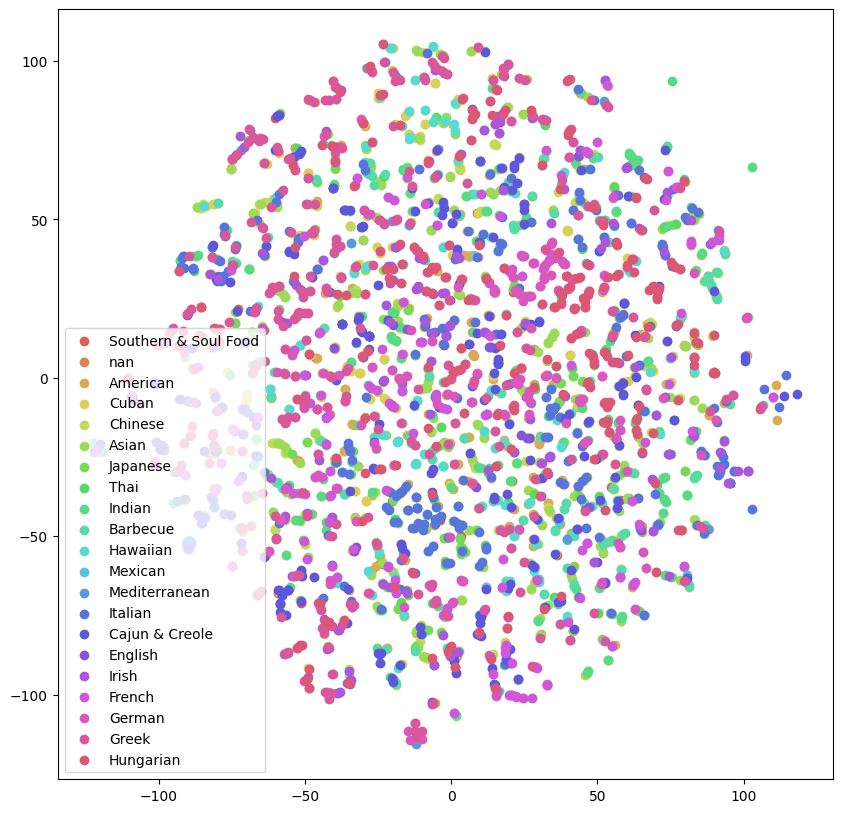

In [19]:
if __name__ == '__main__':


    yum_ingr = pd.read_pickle('yummly_ingr.pkl')
    yum_ingrX = pd.read_pickle('yummly_ingrX.pkl')
    yum_tfidf = pd.read_pickle('yum_tfidf.pkl')

    #select all cuisines and plot tsne clustering with flavor
    df_flavor = yum_tfidf.copy()
    df_flavor['cuisine'] = yum_ingr['cuisine']
    df_flavor['recipeName'] = yum_ingr['recipeName']
    sublist2 = df_flavor['cuisine'].unique()
    tsne_cluster_cuisine(df_flavor,sublist2)
    for perplexity in range(1, 22, 5):
      for n_components in range(2,4,1):
        print("For perplexity: "+ str(perplexity) + " and n_components: " + str(n_components))
        #select all cuisines and do interactive plotting with bokeh
        filename = "test" + str(perplexity) + str(n_components) +".html"
        plot_bokeh(df_flavor, sublist2, filename, perplexity, n_components)

In [20]:
yum_tfidf = pd.read_pickle('yum_tfidf.pkl')

Component 1: 10.33%
Component 2: 7.22%
Component 3: 6.77%
Component 4: 4.56%
Component 5: 4.08%
Component 6: 3.77%
Component 7: 3.49%
Component 8: 3.28%
Component 9: 3.16%
Component 10: 2.62%
Component 11: 2.35%
Component 12: 2.14%
Component 13: 2.10%
Component 14: 1.92%
Component 15: 1.82%
Component 16: 1.75%
Component 17: 1.71%
Component 18: 1.58%
Component 19: 1.47%
Component 20: 1.44%
Component 21: 1.38%
Component 22: 1.29%
Component 23: 1.18%
Component 24: 1.11%
Component 25: 1.03%
Component 26: 0.99%
Component 27: 0.93%
Component 28: 0.90%
Component 29: 0.89%
Component 30: 0.86%
Component 31: 0.81%
Component 32: 0.80%
Component 33: 0.75%
Component 34: 0.74%
Component 35: 0.72%
Component 36: 0.69%
Component 37: 0.65%
Component 38: 0.63%
Component 39: 0.59%
Component 40: 0.58%
Component 41: 0.57%
Component 42: 0.53%
Component 43: 0.52%
Component 44: 0.48%
Component 45: 0.47%
Component 46: 0.44%
Component 47: 0.43%
Component 48: 0.41%
Component 49: 0.40%
Component 50: 0.37%
Componen

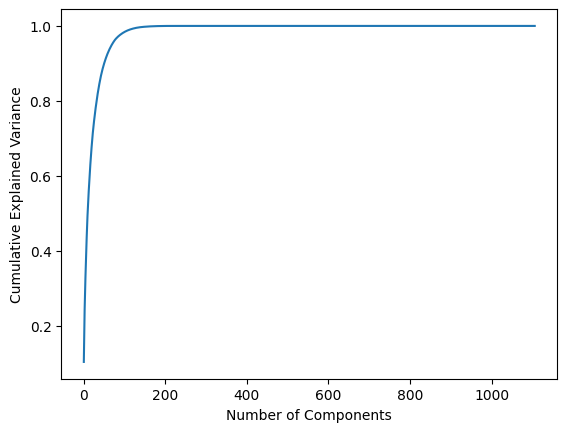

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(yum_tfidf)

# Varience ratio of each component
explained_var_ratio = pca.explained_variance_ratio_

for i, ratio in enumerate(explained_var_ratio):
    print(f"Component {i + 1}: {ratio * 100:.2f}%")

cumulative_explained_var = np.cumsum(explained_var_ratio)
plt.plot(cumulative_explained_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [24]:
# Standardize the data
scaler = StandardScaler()
yum_tfidf_scaled = scaler.fit_transform(yum_tfidf)
k_values = range(2, 15)  # As our data contains roughly 15 different cuisines

In [25]:
# Elbow Analysis
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(yum_tfidf_scaled)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

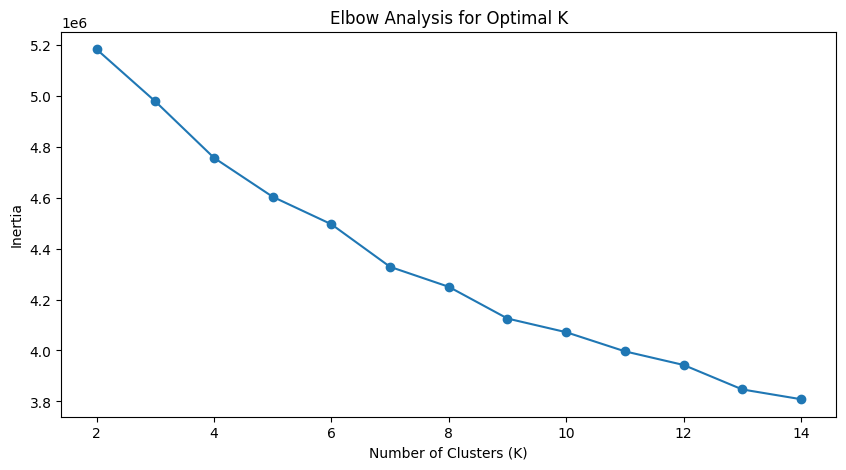

In [26]:
# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=2:
Cluster 1: [  15   33   34 ... 5597 5603 5613]
Cluster 2: [   0    1    2 ... 5619 5620 5621]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=3:
Cluster 1: [  34   35   50 ... 5597 5603 5613]
Cluster 2: [   1    2    5 ... 5617 5618 5619]
Cluster 3: [   0    3    4 ... 5615 5620 5621]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=4:
Cluster 1: [   1    2    4 ... 5618 5619 5621]
Cluster 2: [   0    3    7    9   10   12   13   14   16   17   18   22   23   26
   30   39   40   41   43   44   45   52   57   58   64   69   70   79
   81   83   92   93  101  105  110  111  113  114  115  117  118  121
  122  126  131  132  137  138  140  149  153  154  167  175  184  186
  187  188  189  190  194  201  203  205  209  213  217  218  219  223
  224  225  226  228  234  241  247  251  253  258  259  261  264  265
  266  267  277  282  283  284  287  288  291  292  294  298  300  301
  302  304  306  308  313  315  317  323  328  333  336  338  339  342
  343  345  346  348  358  365  367  380  381  383  385  393  396  403
  404  407  413  418  466  473  474  511  568  578  601  638  646  712
  713  716  725  764  773  774  777  781  808  824  847  855  874  881
  884  890  893  920  925  930  931  945  949  995  999 1000 1010 1020
 1025 1026 1029 1036 1041 1043 1044 1057 1062 1063 1065 1067 1070 1072
 1076 107

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=5:
Cluster 1: [   2    6    8 ... 5609 5610 5619]
Cluster 2: [   1    4    5 ... 5617 5618 5621]
Cluster 3: [   0    3    7    9   10   12   13   14   16   17   22   23   26   30
   39   40   41   43   44   45   52   57   58   64   69   70   79   81
   83   92   93  101  105  110  111  114  115  117  118  121  122  126
  131  132  137  138  149  153  154  167  184  186  187  188  189  190
  194  201  203  205  209  213  217  218  219  222  223  224  225  226
  228  234  241  247  253  258  259  261  264  266  267  277  283  284
  287  288  291  298  300  301  302  304  306  308  313  315  317  323
  328  333  336  338  339  342  345  346  348  358  365  367  380  381
  383  385  393  396  403  404  407  413  418  466  473  474  498  511
  568  578  601  638  646  712  716  725  764  773  774  777  781  808
  847  855  874  881  884  890  893  920  925  930  931  945  949  995
  999 1000 1010 1020 1026 1029 1036 1041 1043 1044 1062 1063 1065 1067
 1070 1076 1079 1085 1087 1103 11

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=6:
Cluster 1: [   1    8   10   11   13   17   20   24   37   38   41   44   47   54
   67   68   79   80   89  121  134  135  143  156  157  158  161  162
  165  175  192  200  213  220  221  224  228  236  241  249  251  267
  283  294  296  307  312  320  358  362  377  393  399  405  410  413
  891  899  908  920  921  922  927  928  930  936  969 1000 1002 1010
 1022 1036 1046 1048 1049 1067 1091 1108 1132 1134 1145 1158 1160 1197
 1206 1207 1261 1273 1307 1372 1532 1548 1555 1568 1570 1582 1602 1603
 1637 1641 1650 1652 1662 1670 1674 1691 1754 1756 1757 1760 1763 1764
 1767 1769 1780 1784 1785 1789 1803 1807 1820 1826 1827 1839 1849 1850
 1852 1856 1869 1879 1896 1926 1931 1946 1950 2001 2013 2044 2057 2060
 2062 2099 2103 2138 2144 2147 2153 2154 2167 2171 2186 2199 2200 2207
 2214 2235 2238 2244 2246 2249 2259 2265 2270 2271 2273 2275 2285 2291
 2296 2303 2305 2311 2313 2315 2317 2319 2324 2345 2348 2361 2363 2373
 2389 2402 2413 2414 2418 2434 2438 2445 2448 2475 2478 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=7:
Cluster 1: [   0    3    9   10   12   13   14   16   17   22   23   26   30   39
   40   41   43   44   45   52   57   58   64   69   70   79   81   83
   92   93  101  105  110  111  114  115  117  118  121  122  126  131
  132  137  138  149  153  154  184  186  187  188  189  194  201  205
  209  213  217  218  219  222  223  224  225  226  228  234  241  247
  253  258  259  261  264  266  277  283  284  287  288  291  298  300
  301  302  304  306  308  313  315  317  323  328  333  336  339  345
  346  348  358  365  367  381  383  385  393  396  403  404  407  413
  418  473  474  498  511  568  578  601  646  712  764  774  777  781
  808  847  855  874  881  884  890  893  920  925  930  995  999 1000
 1010 1020 1026 1029 1036 1041 1043 1044 1062 1065 1067 1070 1076 1079
 1085 1107 1132 1134 1136 1140 1146 1151 1152 1153 1158 1174 1179 1189
 1192 1193 1210 1218 1219 1226 1230 1234 1235 1247 1251 1261 1271 1275
 1278 1289 1307 1308 1323 1397 1508 1532 1563 1568 1621 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=8:
Cluster 1: [  34   35   50   61   77   87   90   96  104  174  180  210  212  235
  293  309  311  340  341  370  388  398  487  508  521  530  534  595
  610  641  663  797  816  864  877  911  912  913  932  939  940  946
  957  959  966  984  985  986  987  988  989  990  991  992  993  996
 1001 1003 1005 1009 1011 1013 1014 1015 1017 1018 1024 1028 1032 1034
 1037 1038 1040 1042 1047 1052 1054 1055 1056 1058 1064 1066 1071 1075
 1082 1086 1088 1093 1100 1104 1105 1111 1112 1113 1114 1115 1118 1122
 1124 1126 1137 1139 1142 1147 1149 1155 1161 1164 1169 1170 1171 1172
 1175 1176 1178 1182 1185 1187 1188 1190 1194 1201 1202 1204 1205 1211
 1212 1213 1214 1216 1217 1220 1229 1238 1239 1243 1244 1245 1246 1248
 1249 1250 1252 1258 1262 1264 1266 1267 1268 1274 1276 1277 1280 1283
 1285 1286 1287 1288 1290 1291 1292 1294 1295 1296 1297 1298 1300 1304
 1309 1311 1313 1314 1317 1319 1321 1552 1559 1560 1585 1599 1600 1610
 1630 1640 1643 1653 1667 1689 1692 1698 1702 1704 1717 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=9:
Cluster 1: [ 199  351  564  642  795  798  865  879  886  906  940  951 1379 1502
 1517 1663 1685 1723 1726 2537 2538 2539 2540 2541 2542 2543 2544 2545
 2546 2547 2548 2549 2550 2551 2553 2554 2555 2557 2558 2559 2560 2561
 2562 2563 2566 2567 2568 2569 2570 2571 2572 2573 2574 2575 2576 2577
 2578 2580 2581 2582 2584 2586 2587 2588 2590 2591 2592 2594 2595 2596
 2597 2598 2599 2600 2601 2602 2603 2604 2605 2606 2607 2609 2610 2611
 2612 2613 2614 2615 2616 2617 2618 2619 2621 2623 2624 2625 2627 2629
 2632 2635 2636 2637 2638 2641 2642 2643 2644 2645 2647 2649 2650 2651
 2652 2654 2656 2657 2658 2659 2660 2661 2663 2665 2667 2668 3134 3178
 4941 4953 5061 5367 5387 5406 5456]
Cluster 2: [   1    4    5 ... 5617 5618 5621]
Cluster 3: [   2    6    8 ... 5602 5610 5619]
Cluster 4: [  33   49   76  142  157  159  163  170  171  176  186  230  237  238
  281  290  297  354  357  372  420  439  458  464  490  503  543  567
  569  609  612  622  635  644  649  674  683  684  707 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=10:
Cluster 1: [  15   33   49   76   86   97  128  134  142  147  157  159  163  170
  171  176  186  230  237  238  256  281  286  290  297  319  357  372
  399  420  424  458  464  480  490  495  503  543  567  569  582  609
  612  622  632  635  640  644  649  674  683  684  707  717  727  740
  746  789  800  804  808  811  823  834  843  858  887  904  942  947
  972 1012 1016 1023 1025 1036 1045 1095 1116 1129 1132 1138 1162 1303
 1332 1335 1337 1338 1339 1352 1356 1361 1362 1363 1366 1372 1374 1380
 1383 1384 1390 1392 1394 1395 1400 1403 1406 1408 1409 1411 1421 1426
 1427 1431 1432 1433 1435 1438 1450 1455 1458 1462 1465 1473 1482 1485
 1493 1494 1495 1497 1504 1505 1513 1514 1515 1516 1519 1522 1527 1531
 1535 1541 1553 1564 1581 1591 1592 1636 1651 1656 1672 1673 1677 1687
 1690 1714 1754 1756 1757 1766 1767 1771 1772 1780 1789 1797 1798 1799
 1800 1807 1810 1812 1820 1822 1825 1826 1831 1834 1835 1842 1852 1856
 1864 1872 1889 1890 1899 1908 1918 1920 1928 1946 1948

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=11:
Cluster 1: [ 144  185  197  240  271  428  442  451  454  456  465  466  468  484
  488  492  504  509  512  516  518  528  532  538  539  540  541  545
  549  550  551  553  554  558  561  566  570  576  577  580  584  585
  592  598  611  616  623  628  637  659  673  675  677  680  690  699
  703  711  719  720  728  731  737  751  757  759  766  770  772  775
  776  781  784  786  788  791  792  799  806  822  826  832  836  838
  839  848  851  856  873  876  878  882  888  910  926  955  973 1089
 1141 1208 1215 1334 1336 1346 1348 1351 1354 1359 1386 1391 1396 1420
 1429 1467 1488 1489 1498 1506 1511 1579 1614 1712 1728 2045 2186 2886
 2935 2936 2938 2940 2941 2942 2943 2944 2945 2947 2948 2949 2950 2951
 2952 2953 2954 2955 2956 2957 2958 2961 2964 2965 2968 2969 2971 2972
 2973 2976 2977 2980 2983 2986 2988 2989 2991 2992 2993 2994 2996 2999
 3000 3001 3002 3003 3004 3005 3006 3007 3010 3013 3014 3015 3016 3018
 3019 3020 3021 3022 3024 3025 3027 3028 3029 3030 3031

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=12:
Cluster 1: [   2    6   25   29   51   65   71   99  102  103  107  109  112  116
  124  125  133  144  148  150  155  177  178  179  181  182  183  185
  196  197  198  204  206  207  211  229  231  240  243  252  254  255
  257  260  263  271  273  274  305  314  318  324  325  330  334  352
  363  366  368  373  374  379  384  387  400  408  411  415  428  442
  454  455  456  465  468  482  484  492  509  512  515  532  539  540
  541  547  551  553  554  558  560  561  562  570  577  581  596  598
  616  617  621  623  624  629  637  659  668  680  687  689  699  703
  706  711  720  728  731  737  759  766  772  775  784  786  788  791
  806  822  836  839  848  856  863  867  870  873  875  876  878  880
  882  885  888  895  905  910  917  923  924  926  944  952  953  964
  965  970  975  976  979  982 1004 1008 1019 1031 1039 1053 1060 1073
 1089 1092 1099 1101 1123 1127 1130 1133 1141 1156 1200 1208 1232 1237
 1242 1254 1255 1260 1269 1279 1310 1336 1346 1354 1355

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=13:
Cluster 1: [ 169 1562 2750 3226 3228 3235 3368 3381 3383 5186 5206 5398]
Cluster 2: [ 163  186  208  232  260  341  343  347  383  443  459  460  470  479
  482  487  490  493  500  501  503  508  510  523  527  531  534  535
  546  555  556  563  572  583  591  593  599  605  607  619  621  625
  630  647  651  652  655  676  681  682  691  700  701  704  717  718
  739  758  778  783  796  801  902  996 1046 1052 1086 1106 1107 1146
 1147 1151 1152 1161 1172 1189 1191 1213 1233 1243 1288 1293 1307 1363
 1406 1414 1417 1426 1431 1433 1447 1448 1449 1450 1452 1460 1463 1477
 1497 1732 1737 1751 1766 1777 1799 1810 1812 1822 1834 1835 1837 1844
 1914 1918 1920 1947 1979 2057 2087 2088 2271 2585 2671 2675 2678 2680
 2700 2708 2715 2717 2728 2746 2764 2790 2792 2796 2805 2809 2818 2826
 2827 2839 2851 2858 2864 2884 2918 2922 2924 2925 2927 2929 2931 2932
 2933 2990 2995 3245 3321 3360 3401 3425 3439 3460 3470 3492 3502 3507
 3525 3527 3536 3551 3587 3588 3604 3610 3612 3649 36

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



For K=14:
Cluster 1: [ 163  186  208  232  260  341  343  347  383  443  459  460  470  479
  482  487  490  493  500  501  503  508  510  523  527  531  534  535
  546  555  556  563  572  583  591  593  599  605  607  619  621  625
  630  647  651  652  655  676  681  682  691  700  701  704  717  718
  739  758  778  783  796  801  902  996 1046 1052 1086 1106 1107 1146
 1147 1151 1152 1161 1172 1189 1191 1213 1233 1243 1288 1293 1307 1363
 1406 1414 1417 1426 1431 1433 1447 1448 1449 1450 1452 1460 1463 1477
 1497 1732 1737 1751 1766 1777 1799 1810 1812 1822 1834 1835 1837 1844
 1914 1918 1920 1947 1979 2057 2087 2088 2271 2585 2671 2675 2678 2680
 2694 2700 2708 2715 2717 2728 2746 2764 2790 2792 2796 2805 2809 2818
 2826 2827 2839 2851 2858 2864 2884 2918 2922 2924 2925 2927 2929 2931
 2932 2933 2990 2995 3245 3281 3321 3360 3401 3425 3439 3460 3470 3492
 3502 3507 3525 3527 3536 3551 3587 3588 3604 3610 3612 3649 3650 3688
 3725 3771 3780 3793 3798 3826 3833 3834 3837 3847 3852

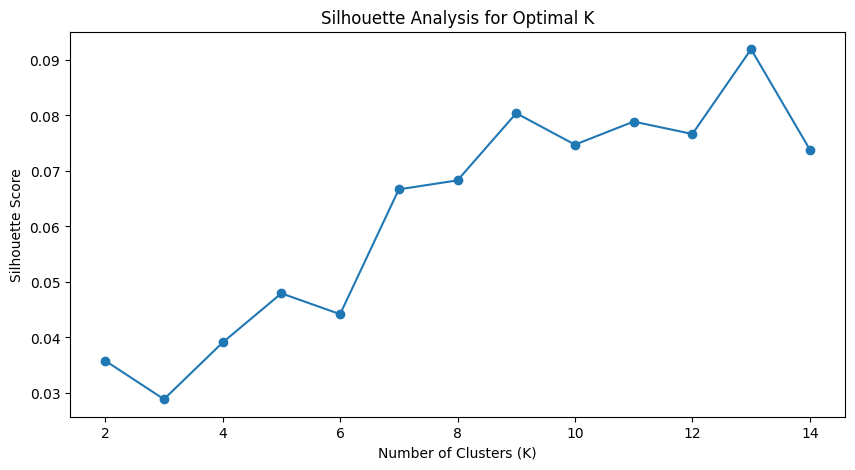

In [27]:
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(yum_tfidf_scaled)
    silhouette_avg = silhouette_score(yum_tfidf_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"\nFor K={k}:")
    for cluster_num in range(k):
        cluster_samples = np.where(cluster_labels == cluster_num)[0]
        print(f"Cluster {cluster_num + 1}:", cluster_samples)

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [28]:
scaler = StandardScaler()
yum_tfidf_scaled = scaler.fit_transform(yum_tfidf)

param_space = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': [5]
}


n_iter = 5
random_search = ParameterSampler(param_space, n_iter=n_iter, random_state=42)

best_eps = None
best_silhouette_score = float('-inf')

for params in random_search:
    dbscan = DBSCAN(**params)
    dbscan_labels = dbscan.fit_predict(yum_tfidf_scaled)


    if len(set(dbscan_labels)) > 1:
        silhouette_avg = silhouette_score(yum_tfidf_scaled, dbscan_labels)

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = params['eps']

print(f"Best eps: {best_eps}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Best eps: 0.9
Best Silhouette Score: -0.14186446554412688


In [29]:
scaler = StandardScaler()
yum_tfidf_scaled = scaler.fit_transform(yum_tfidf)


param_space_hierarchical = {
    'n_clusters': [2, 3, 4],
    'linkage': ['ward', 'complete', 'average', 'single']
}


n_iter = 5
random_search_hierarchical = ParameterSampler(param_space_hierarchical, n_iter=n_iter, random_state=42)

best_n_clusters = None
best_linkage = None
best_silhouette_score_hierarchical = float('-inf')

for params in random_search_hierarchical:
    hierarchical = AgglomerativeClustering(**params)
    hierarchical_labels = hierarchical.fit_predict(yum_tfidf_scaled)


    if len(set(hierarchical_labels)) > 1:
        silhouette_avg_hierarchical = silhouette_score(yum_tfidf_scaled, hierarchical_labels)

        if silhouette_avg_hierarchical > best_silhouette_score_hierarchical:
            best_silhouette_score_hierarchical = silhouette_avg_hierarchical
            best_n_clusters = params['n_clusters']
            best_linkage = params['linkage']

print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best Linkage: {best_linkage}")
print(f"Best Silhouette Score: {best_silhouette_score_hierarchical}")

Best Number of Clusters: 2
Best Linkage: single
Best Silhouette Score: 0.8192571374906994


In [30]:
scaler = StandardScaler()
yum_tfidf_scaled = scaler.fit_transform(yum_tfidf)


param_space_gmm = {
    'n_components': [2, 3, 4],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}


n_iter = 5
random_search_gmm = ParameterSampler(param_space_gmm, n_iter=n_iter, random_state=42)

best_n_components_gmm = None
best_covariance_type = None
best_silhouette_score_gmm = float('-inf')

for params in random_search_gmm:
    gmm = GaussianMixture(**params, random_state=42)
    gmm_labels = gmm.fit_predict(yum_tfidf_scaled)


    if len(set(gmm_labels)) > 1:
        silhouette_avg_gmm = silhouette_score(yum_tfidf_scaled, gmm_labels)

        if silhouette_avg_gmm > best_silhouette_score_gmm:
            best_silhouette_score_gmm = silhouette_avg_gmm
            best_n_components_gmm = params['n_components']
            best_covariance_type = params['covariance_type']


print(f"Best Number of Components: {best_n_components_gmm}")
print(f"Best Covariance Type: {best_covariance_type}")
print(f"Best Silhouette Score: {best_silhouette_score_gmm}")

Best Number of Components: 2
Best Covariance Type: spherical
Best Silhouette Score: 0.20712610938300322
